In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import scipy.stats as stats
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2]:
carbonMonoOxide2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/CarbonMonoOxide_2019.csv")
carbonMonoOxide2020.describe()



,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,7205.000000,7205.0,7205.000000,7205.000000,7205.0,7205.0,7205.000000,7205.000000,7205.000000,7205.000000,7205.000000,7205.000000,7205.000000,3603.000000,7205.000000,7205.000000
mean,3602.000000,36.0,49.900208,158.033449,42101.0,1.0,41.998873,-75.922121,23.342540,97.286051,0.243779,0.350589,8.485496,3.426034,530.324774,28317.498959
std,2080.048677,0.0,31.593065,287.927349,0.0,0.0,1.028560,2.123501,2.222138,9.228028,0.084768,0.181306,8.321798,1.785020,167.763177,11148.629006
min,0.000000,36.0,1.000000,3.000000,42101.0,1.0,40.736140,-78.809526,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,54.000000,10580.000000
25%,1801.000000,36.0,29.000000,12.000000,42101.0,1.0,40.819760,-77.557280,24.000000,100.000000,0.200000,0.213000,0.000000,2.000000,593.000000,15380.000000
50%,3602.000000,36.0,55.000000,124.000000,42101.0,1.0,42.091420,-77.209780,24.000000,100.000000,0.226087,0.300000,6.000000,3.000000,593.000000,35620.000000
75%,5403.000000,36.0,81.000000,133.000000,42101.0,1.0,42.921107,-73.821530,24.000000,100.000000,0.280583,0.400000,17.000000,5.000000,593.000000,35620.000000
max,7204.000000,36.0,101.000000,1007.000000,42101.0,1.0,43.146180,-73.757330,24.000000,100.000000,1.004125,2.857000,23.000000,17.000000,593.000000,40380.000000


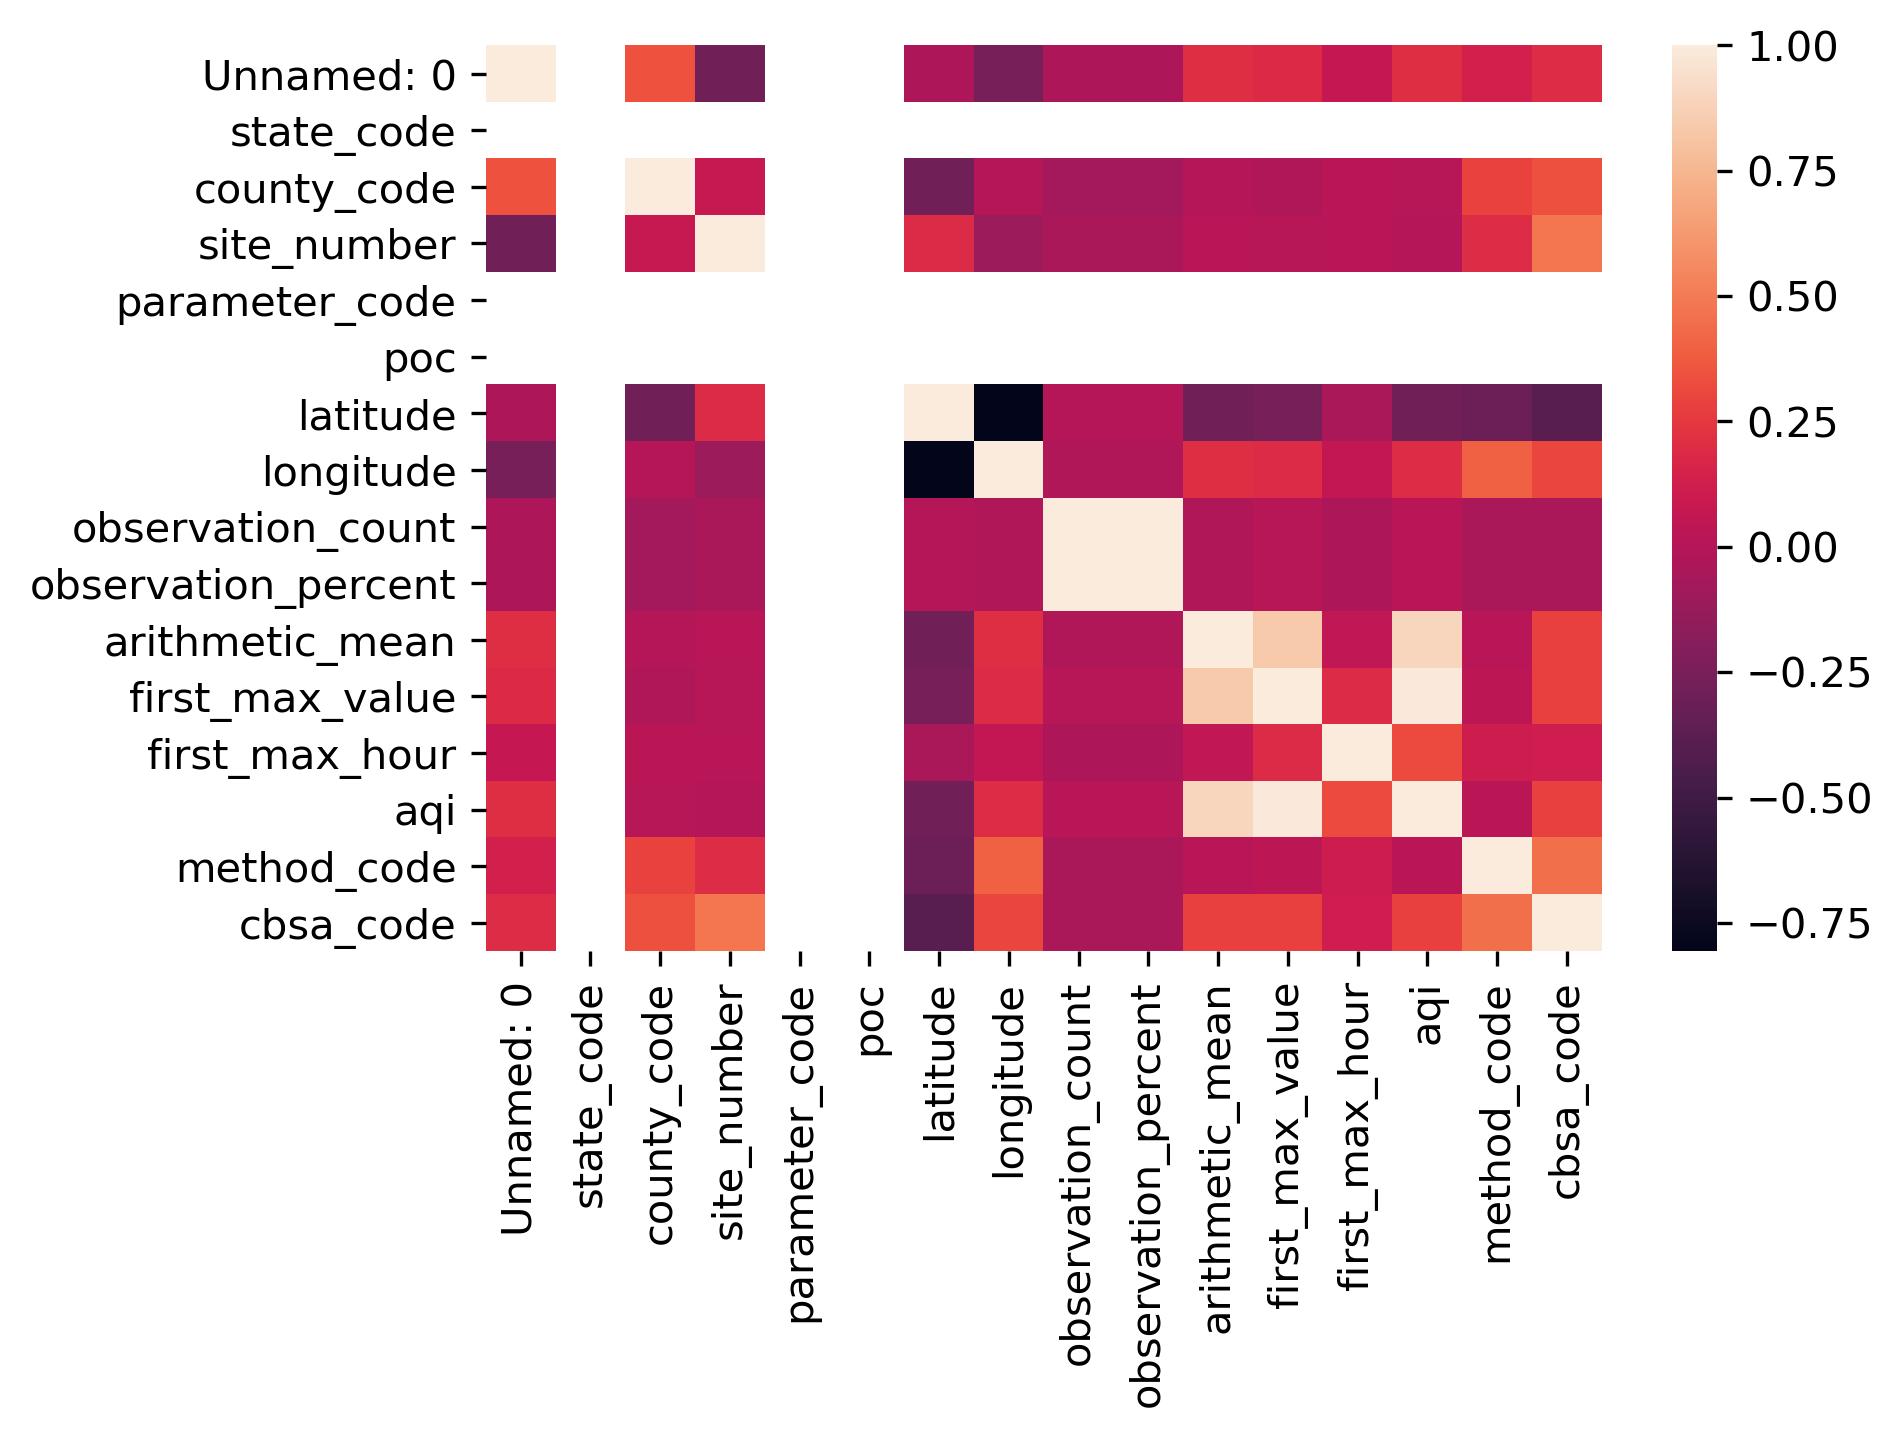

In [3]:

corr=carbonMonoOxide2020.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(3)
# plt.matshow(corr)
# plt.show()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/filename.png',dpi=300)

In [5]:
missingValueCount=carbonMonoOxide2020.isnull().sum()

print(missingValueCount)

Unnamed: 0                0
state_code                0
county_code               0
site_number               0
parameter_code            0
poc                       0
latitude                  0
longitude                 0
datum                     0
parameter                 0
sample_duration           0
pollutant_standard        0
date_local                0
units_of_measure          0
event_type                0
observation_count         0
observation_percent       0
validity_indicator        0
arithmetic_mean           0
first_max_value           0
first_max_hour            0
aqi                    3602
method_code               0
method                    0
local_site_name           0
site_address              0
state                     0
county                    0
city                      0
cbsa_code                 0
cbsa                      0
date_of_last_change       0
dtype: int64


In [6]:
carbonMonoOxide2020.shape
list(carbonMonoOxide2020.columns) 
print(carbonMonoOxide2020['method_code'].unique())
print(carbonMonoOxide2020['pollutant_standard'].unique())
grouped=carbonMonoOxide2020.groupby(['pollutant_standard'])
print(grouped['pollutant_standard'].count())
print(carbonMonoOxide2020['sample_duration'].unique())
print(carbonMonoOxide2020['units_of_measure'].unique())
print(carbonMonoOxide2020['event_type'].unique())



[ 54 554 593]
['CO 1-hour 1971' 'CO 8-hour 1971']
pollutant_standard
CO 1-hour 1971    3602
CO 8-hour 1971    3603
Name: pollutant_standard, dtype: int64
['1 HOUR' '8-HR RUN AVG END HOUR']
['Parts per million']
['None']


In [7]:
#1. removing columns

#removing country_code and state_code because it is same for all data points




#2. removing rows
carbonMonoOxide2020New=carbonMonoOxide2020[['date_local','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','state']].copy()

carbonMonoOxide2020New = carbonMonoOxide2020New[carbonMonoOxide2020New['pollutant_standard'] == "CO 8-hour 1971"] 
print(carbonMonoOxide2020New.shape)

#----begin converting date_local column type from object to datetime64-------

#3. parsing dates
carbonMonoOxide2020New['date_local']=pd.to_datetime(carbonMonoOxide2020New['date_local'])

# carbonMonoOxide2020New.index=carbonMonoOxide2020New['date_local']


#4. null value check

missingValueCount=carbonMonoOxide2020New.isnull().sum()
print(missingValueCount)

                               



(3603, 11)
date_local            0
site_number           0
parameter             0
sample_duration       0
pollutant_standard    0
validity_indicator    0
arithmetic_mean       0
first_max_value       0
aqi                   0
local_site_name       0
state                 0
dtype: int64


In [8]:
######Remove Invalid Values ######

print(carbonMonoOxide2020New['validity_indicator'].unique())
grouped=carbonMonoOxide2020New.groupby(['validity_indicator'])
print(grouped['validity_indicator'].count())


carbonMonoOxide2020New = carbonMonoOxide2020New[carbonMonoOxide2020New['validity_indicator'] == "Y"] 
print(carbonMonoOxide2020New.shape)
# carbonMonoOxide2020New.to_csv('E:/projects/CSE-587-Air-Quality-Prediction-Model/CleanedData/ozone_ny_data_2020.csv')




['Y']
validity_indicator
Y    3603
Name: validity_indicator, dtype: int64
(3603, 11)


In [9]:
#5. duplicate check

duplicate = carbonMonoOxide2020New[carbonMonoOxide2020New.duplicated(['date_local','local_site_name','arithmetic_mean','first_max_value','aqi'])] 
    
print(duplicate)

    

Empty DataFrame
Columns: [date_local, site_number, parameter, sample_duration, pollutant_standard, validity_indicator, arithmetic_mean, first_max_value, aqi, local_site_name, state]
Index: []


In [10]:
#6. removing outliers using robust z-score --- use this

#plot some graph
med=np.median(carbonMonoOxide2020New['arithmetic_mean'])
ma = stats.median_abs_deviation(carbonMonoOxide2020New['arithmetic_mean'])
mad=np.median(ma)
carbonMonoOxide2020New = carbonMonoOxide2020New.query('(((0.6745*(arithmetic_mean-@med))/@mad)<3) & (((0.6745*(arithmetic_mean-@med))/@mad)>-3)')
print(carbonMonoOxide2020New.shape)
carbonMonoOxide2020New.describe()

(3365, 11)


,site_number,arithmetic_mean,first_max_value,aqi
count,3365.000000,3365.000000,3365.000000,3365.000000
mean,159.645765,0.229497,0.291204,3.144725
std,294.445550,0.057628,0.097623,1.339792
min,3.000000,0.083333,0.100000,1.000000
25%,12.000000,0.200000,0.200000,2.000000
50%,23.000000,0.216667,0.300000,3.000000
75%,133.000000,0.266667,0.300000,3.000000
max,1007.000000,0.370833,0.800000,9.000000


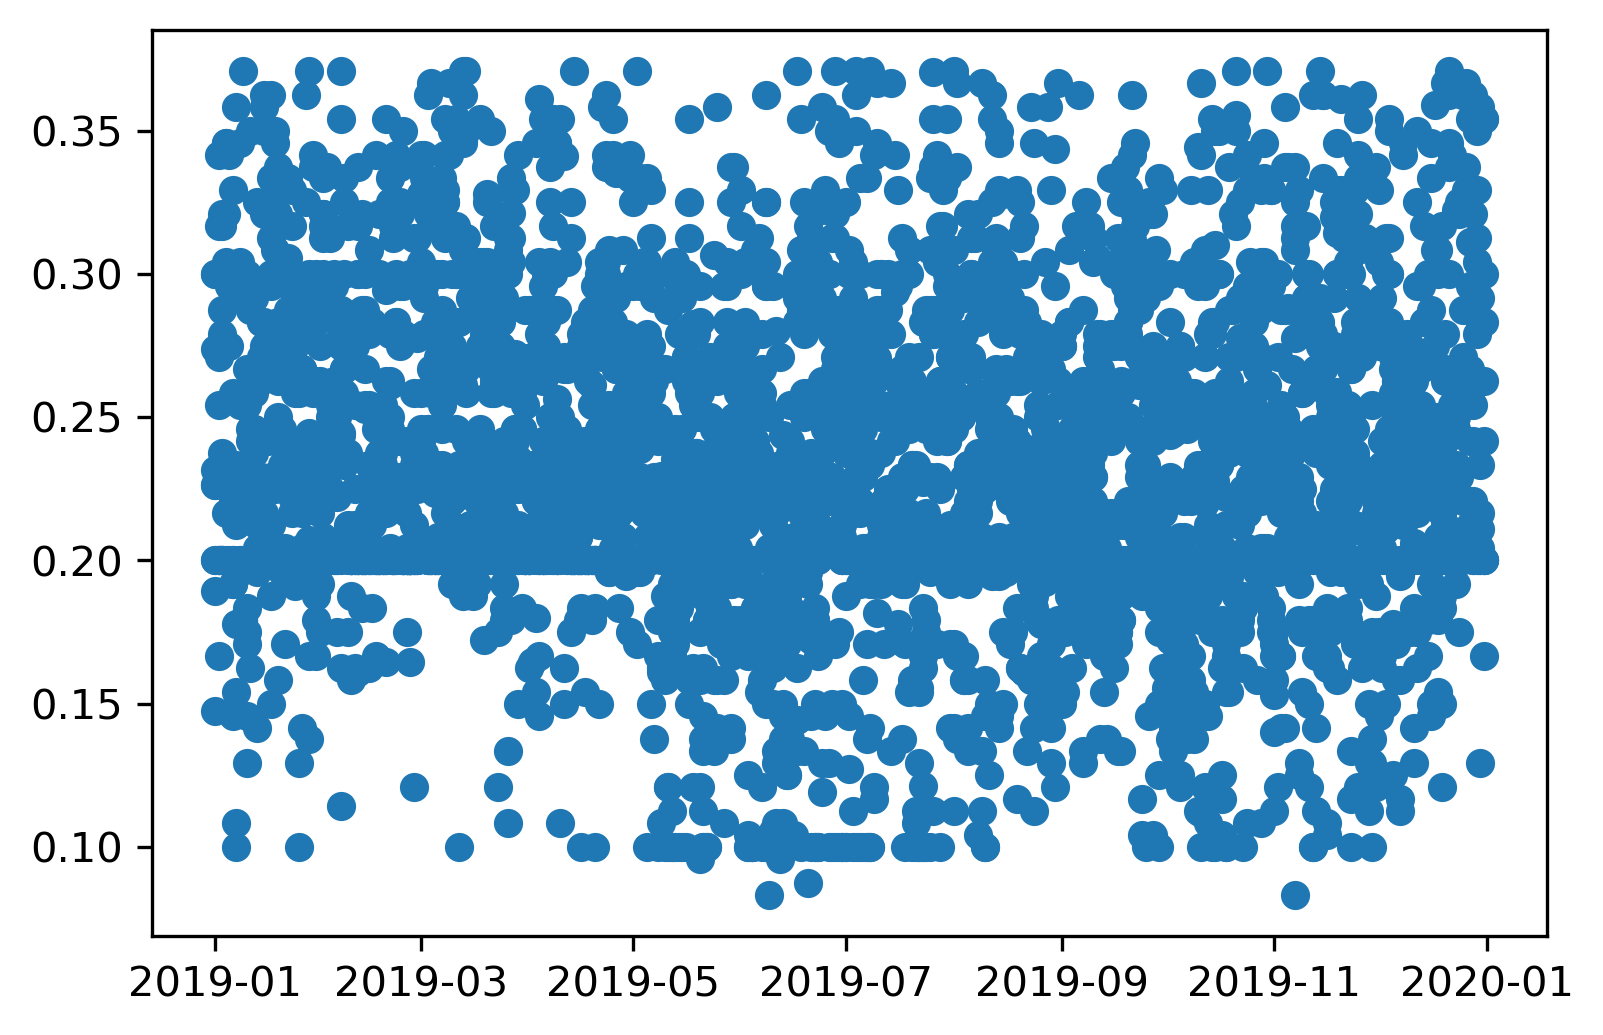

In [11]:
#group by date and average
plt.scatter(x=carbonMonoOxide2020New['date_local'], y=carbonMonoOxide2020New['arithmetic_mean'])

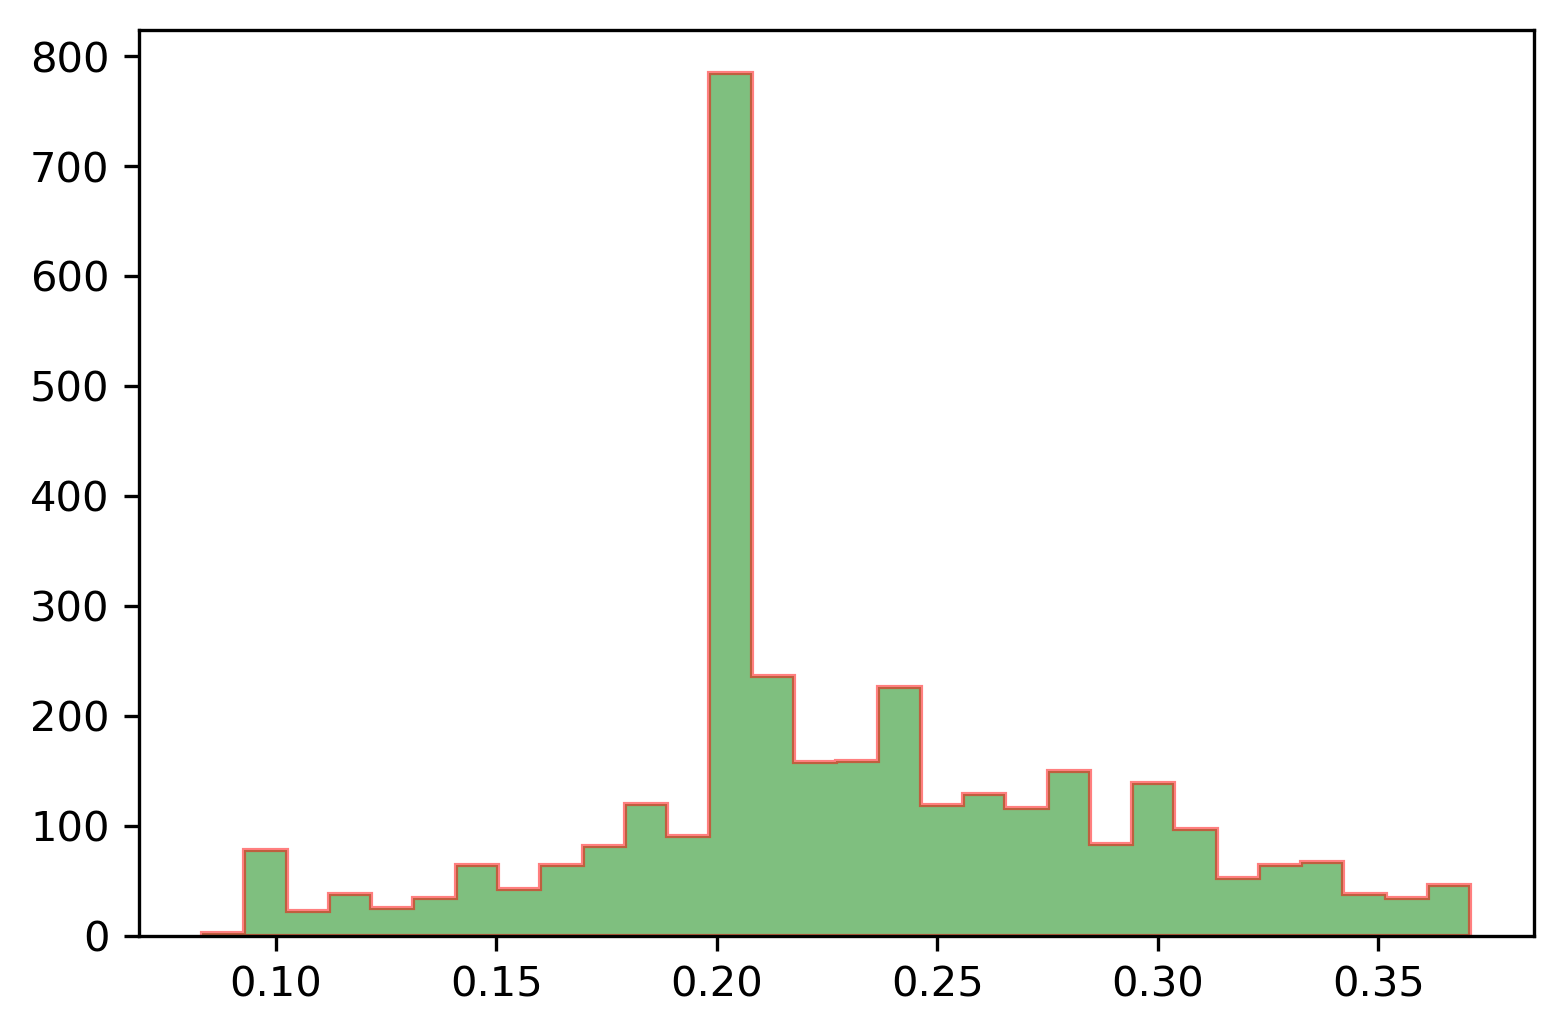

In [12]:
plt.hist(carbonMonoOxide2020New['arithmetic_mean'], bins=30, alpha=0.5,
histtype='stepfilled', color='green',
edgecolor='red');

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


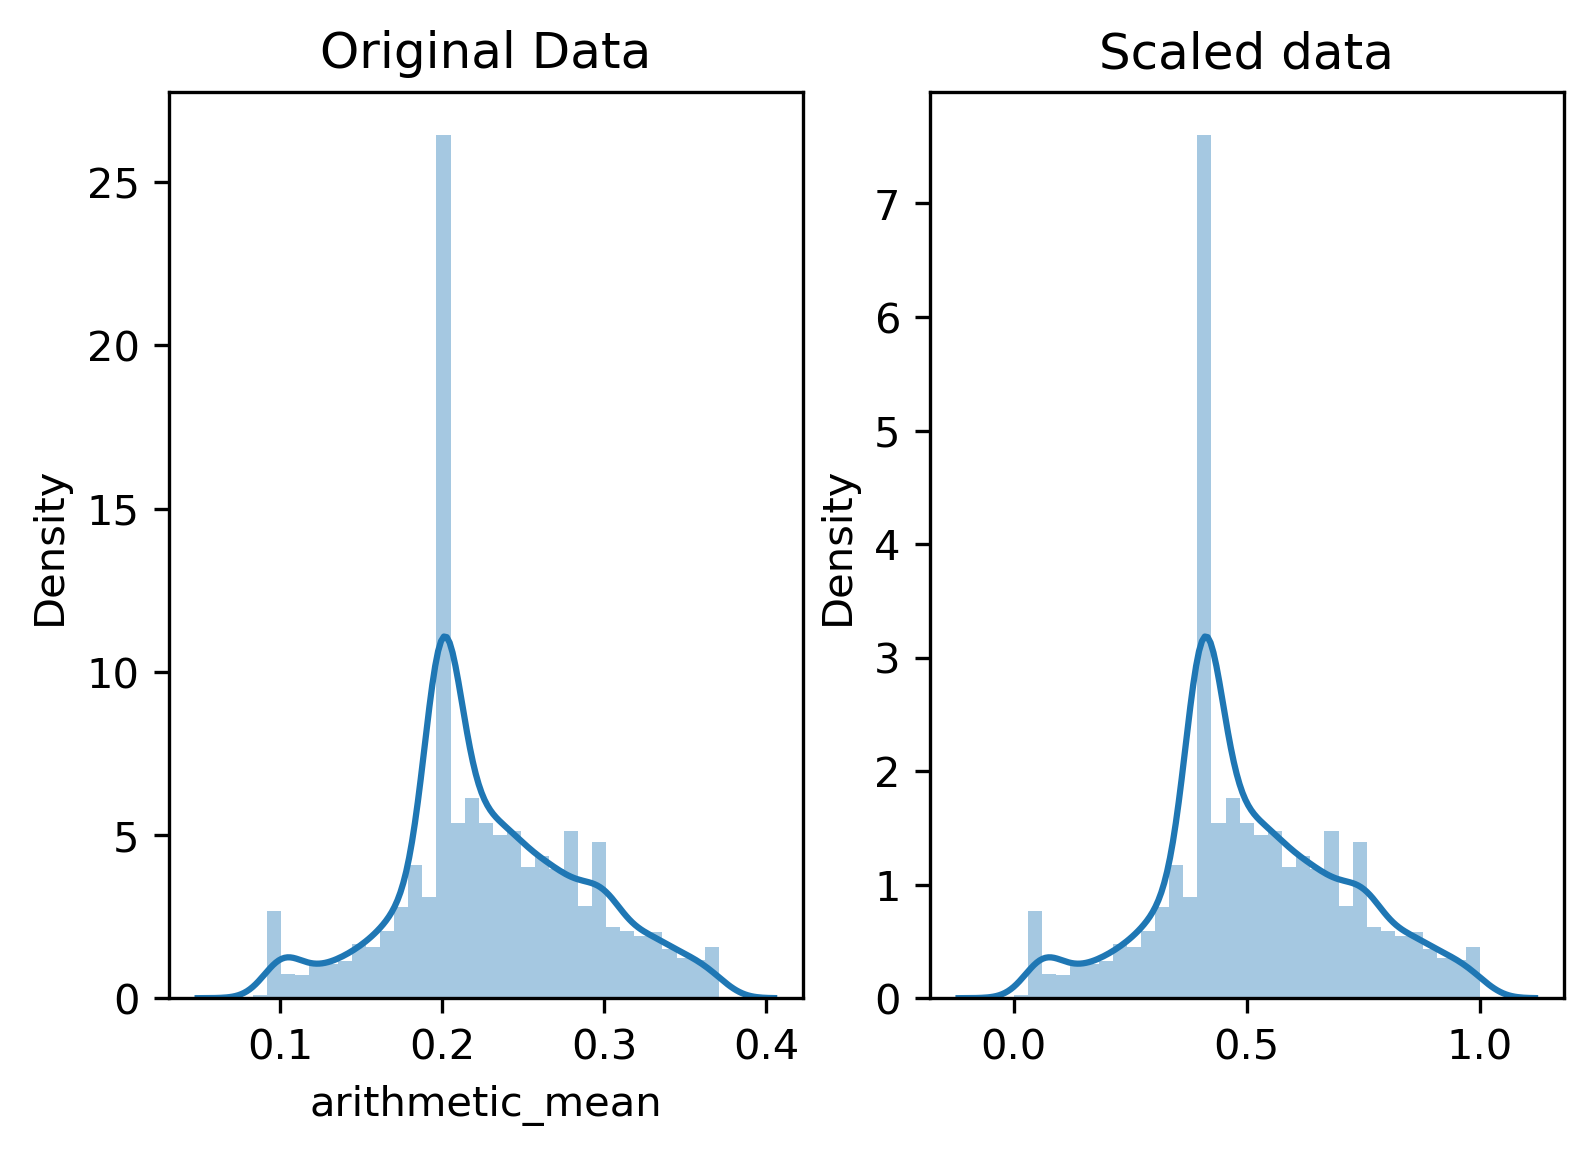

In [13]:
#7.scale

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(carbonMonoOxide2020New['arithmetic_mean'].to_numpy().reshape(-1,1))
fig, ax=plt.subplots(1,2)

sns.distplot(carbonMonoOxide2020New['arithmetic_mean'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
carbonMonoOxide2020New['arithmetic_mean']=scaled_data

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

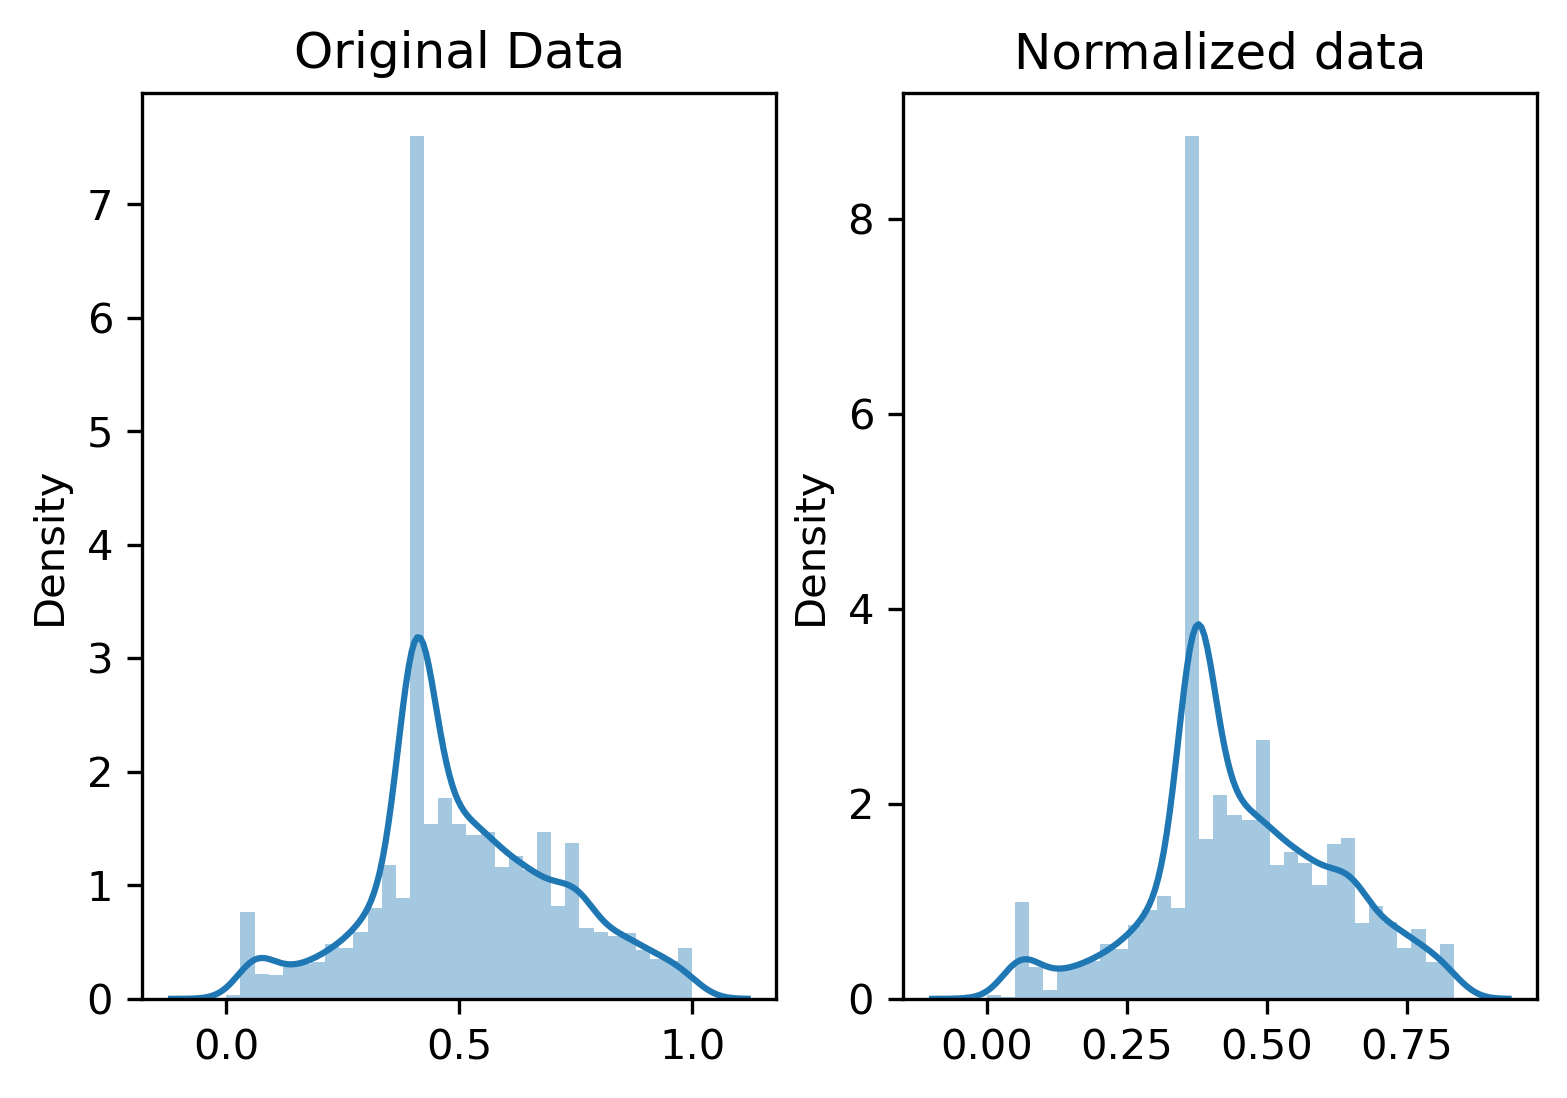

In [14]:
#8.normalize

normalized_data = stats.yeojohnson(carbonMonoOxide2020New['arithmetic_mean'])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(scaled_data.flatten(), ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")


In [ ]:
# 9. Adding season column


In [ ]:
#10 . Merging


In [ ]:
sns.pairplot(df, hue="species")